#### Exploratory Analysis of the Interactions

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

np.random.seed(42)
sns.set_style('ticks')
sns.set_palette('colorblind')

In [16]:
interaction_statistics = pd.read_csv('../data/statistics.csv')
interaction_statistics.head(2)

,user_id,part_one_time,part_two_time,overall_time,part_one_artwork_time_m,part_one_artwork_time_std,part_two_artwork_time_m,part_two_artwork_time_std,num_artworks_part_one,num_artworks_part_two,...,num_visited_before_first_choice_part_one,time_before_first_choice_part_one,num_visited_before_first_choice_part_two,time_before_first_selection_part_two,show_more_part_one,artwork_selected_part_one,artwork_deselected_part_one,show_more_part_two,artwork_selected_part_two,artwork_deselected_part_two
0,6737f57f-8646-4c03-9546-8da5a719d226,1.900,1.750,3.65,1.400,0.490,1.682,1.742,32,27,...,1,0.000,0,0.000,0,32,0,0,27,0
1,86b266c0-920c-4e83-802d-0083a06f3f1d,1.233,0.667,1.90,1.938,0.428,2.375,0.484,20,10,...,1,0.017,1,0.017,0,20,0,0,10,0


In [17]:
interaction_statistics.columns

Index(['user_id', 'part_one_time', 'part_two_time', 'overall_time',
       'part_one_artwork_time_m', 'part_one_artwork_time_std',
       'part_two_artwork_time_m', 'part_two_artwork_time_std',
       'num_artworks_part_one', 'num_artworks_part_two', 'total_events',
       'num_revisits_part_one', 'num_revisits_part_two',
       'num_visited_before_first_choice_part_one',
       'time_before_first_choice_part_one',
       'num_visited_before_first_choice_part_two',
       'time_before_first_selection_part_two', 'show_more_part_one',
       'artwork_selected_part_one', 'artwork_deselected_part_one',
       'show_more_part_two', 'artwork_selected_part_two',
       'artwork_deselected_part_two'],
      dtype='object')

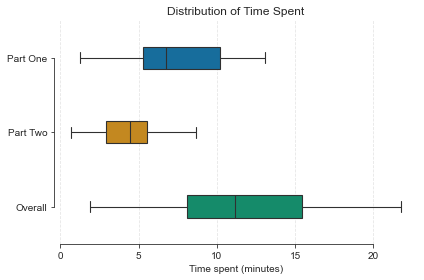

In [18]:
# time spent in the two parts - what is the distribution?
p = sns.boxplot(
    data = interaction_statistics[['part_one_time', 'part_two_time', 'overall_time']],
    orient = 'h',
    width = 0.3,
    linewidth = 1.1,
    notch = False, 
    showfliers = False,
)
p.set(
    xlabel = 'Time spent (minutes)',
    yticklabels = [
        'Part One', 'Part Two', 'Overall'
    ],
    xticks = [0, 5, 10, 15, 20],
    title = 'Distribution of Time Spent'
)
p.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
p.set_axisbelow(True)
sns.despine(trim = True)
plt.tight_layout()
plt.show()

In [19]:
# Distribution of time spent segemented by the condition
# read in the data on the conditions
post_study = pd.read_csv('../data/post-study.csv')
post_study[['part_order', 'part_condition']].head()

# merge the required columns
interaction_statistics = interaction_statistics.merge(
    right = post_study[post_study.part_order.str.contains('model')][['user_id', 'part_condition']],
    on = 'user_id'
)

# split the columns so we get the info we need to plot
interaction_statistics[['part_seen_model', 'model_condition']] = interaction_statistics['part_condition'].str.split('part_(one|two)', n = 1, expand=True)[[1, 2]]

In [23]:
interaction_statistics[['part_one_time', 'part_two_time', 'overall_time', 'part_seen_model', 'model_condition']]

,part_one_time,part_two_time,overall_time,part_seen_model,model_condition
0,13.083,8.683,21.767,one,_image
1,10.267,4.517,14.783,one,_meta
2,21.250,6.017,27.267,one,_image
3,6.517,4.317,10.833,one,_concatenated
4,5.217,2.100,7.317,one,_concatenated
5,5.333,2.650,7.983,one,_concatenated
6,4.300,3.217,7.517,one,_image
7,11.400,7.183,18.583,one,_image
8,8.300,5.983,14.283,one,_meta
9,5.467,2.817,8.283,one,_concatenated
